In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import zipfile
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


In [4]:
TRAINING_DIR = "/content/drive/My Drive/Face Age Dataset/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/My Drive/Face Age Dataset/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)


Found 1714 images belonging to 4 classes.
Found 610 images belonging to 4 classes.


In [10]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 82944)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

Epoch 1/20
54/54 [==============================] - 133s 2s/step - loss: 1.8367 - accuracy: 0.4043 - val_loss: 2.0147 - val_accuracy: 0.2984
Epoch 2/20
54/54 [==============================] - 134s 2s/step - loss: 1.1383 - accuracy: 0.4148 - val_loss: 3.1161 - val_accuracy: 0.3705
Epoch 3/20
54/54 [==============================] - 121s 2s/step - loss: 1.1010 - accuracy: 0.4475 - val_loss: 2.5803 - val_accuracy: 0.3361
Epoch 4/20
54/54 [==============================] - 120s 2s/step - loss: 1.0588 - accuracy: 0.4662 - val_loss: 3.6217 - val_accuracy: 0.3131
Epoch 5/20
54/54 [==============================] - 120s 2s/step - loss: 1.0646 - accuracy: 0.4732 - val_loss: 5.2773 - val_accuracy: 0.3492
Epoch 6/20
54/54 [==============================] - 119s 2s/step - loss: 1.0469 - accuracy: 0.4802 - val_loss: 6.1924 - val_accuracy: 0.3623
Epoch 7/20
54/54 [==============================] - 123s 2s/step - loss: 1.0259 - accuracy: 0.4912 - val_loss: 5.4140 - val_accuracy: 0.4131
Epoch 8/20
54

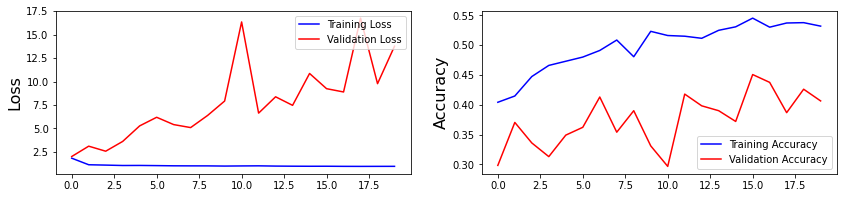

In [11]:

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=20, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
